In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score,confusion_matrix

In [2]:
df = pd.read_csv('E:\Agentic\RL_testing\log2.csv')
df.dropna(inplace=True)
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [3]:
df.Action=df.Action.replace({"allow":3,"drop":1,"deny":2,"reset-both":0})

C:\Users\Satyam Jii\AppData\Local\Temp\ipykernel_13972\1294588334.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Action=df.Action.replace({"allow":3,"drop":1,"deny":2,"reset-both":0})


In [4]:
df.shape

(65532, 12)

In [5]:
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,3,177,94,83,2,30,1,1
1,56258,3389,56258,3389,3,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,3,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,3,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,3,25358,6778,18580,31,16,13,18


In [6]:
df.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

In [7]:
y = df['Action']
X = df.drop('Action',axis=1)
X.shape, y.shape

((65532, 11), (65532,))

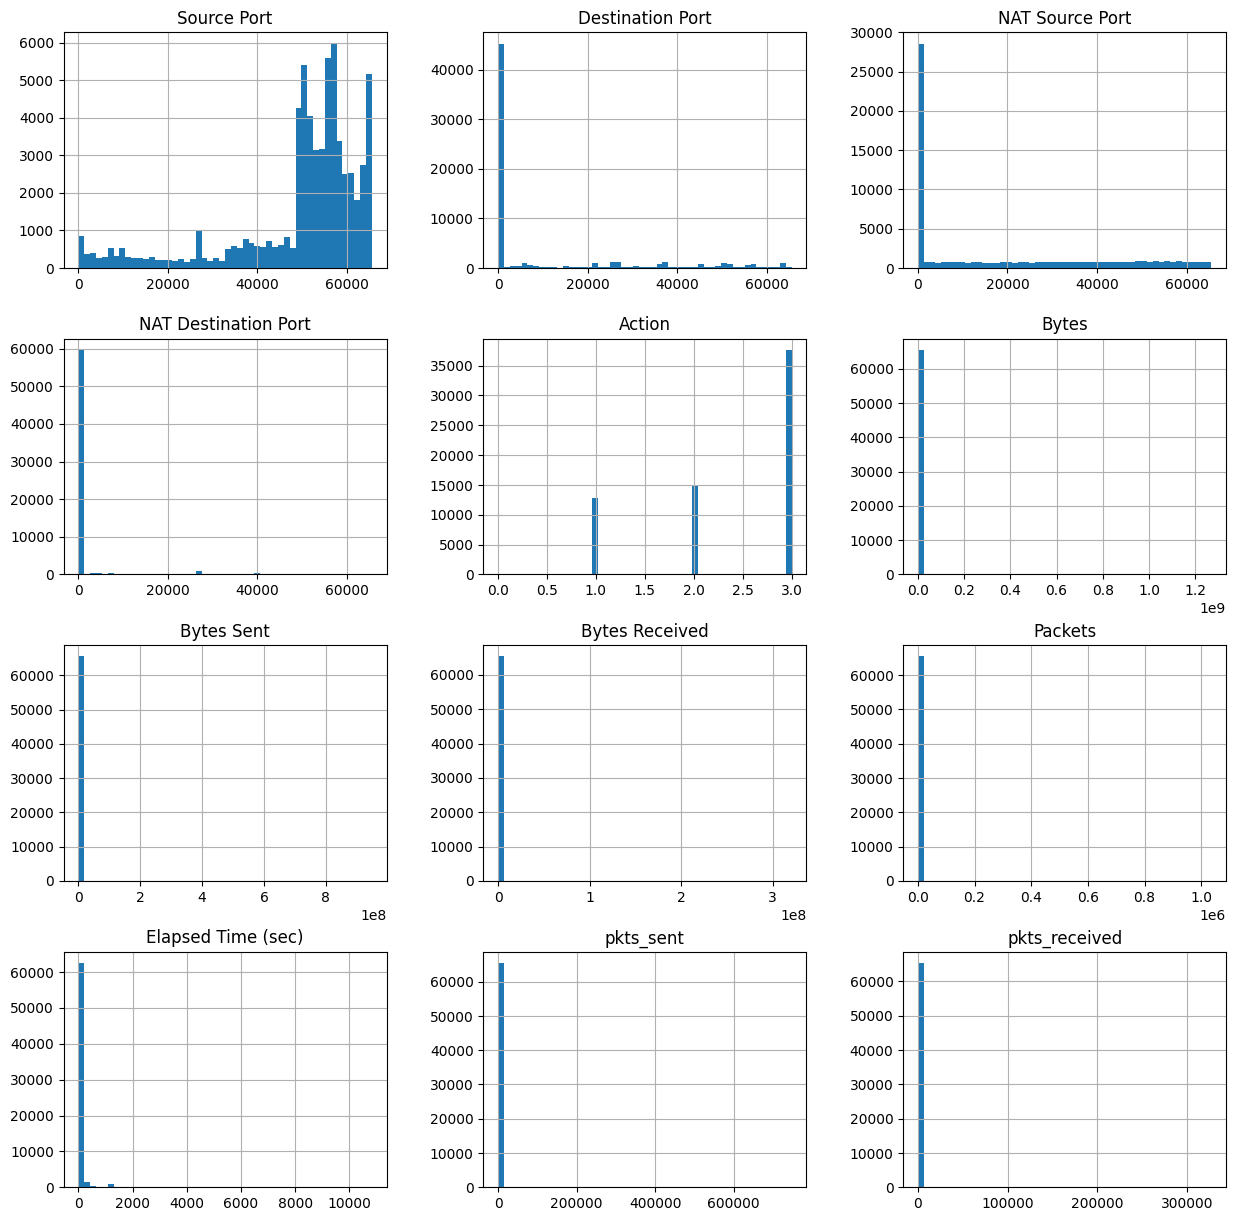

In [8]:
df.hist(bins = 50,figsize = (15,15))

plt.show()

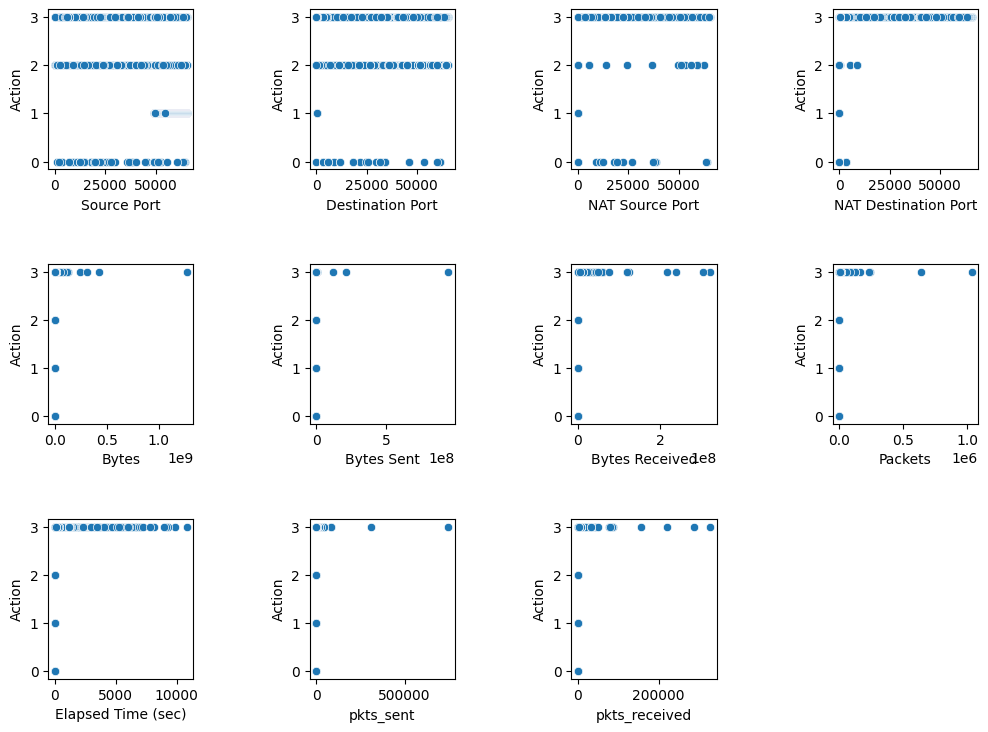

In [9]:
fig = plt.figure(figsize=[12,12])
fig.subplots_adjust(hspace=0.6, wspace=0.8)
p=1

for i in X.columns:
  plt.subplot(4,4,p)
  sns.scatterplot(x=i,y='Action',data=df)
  p+=1


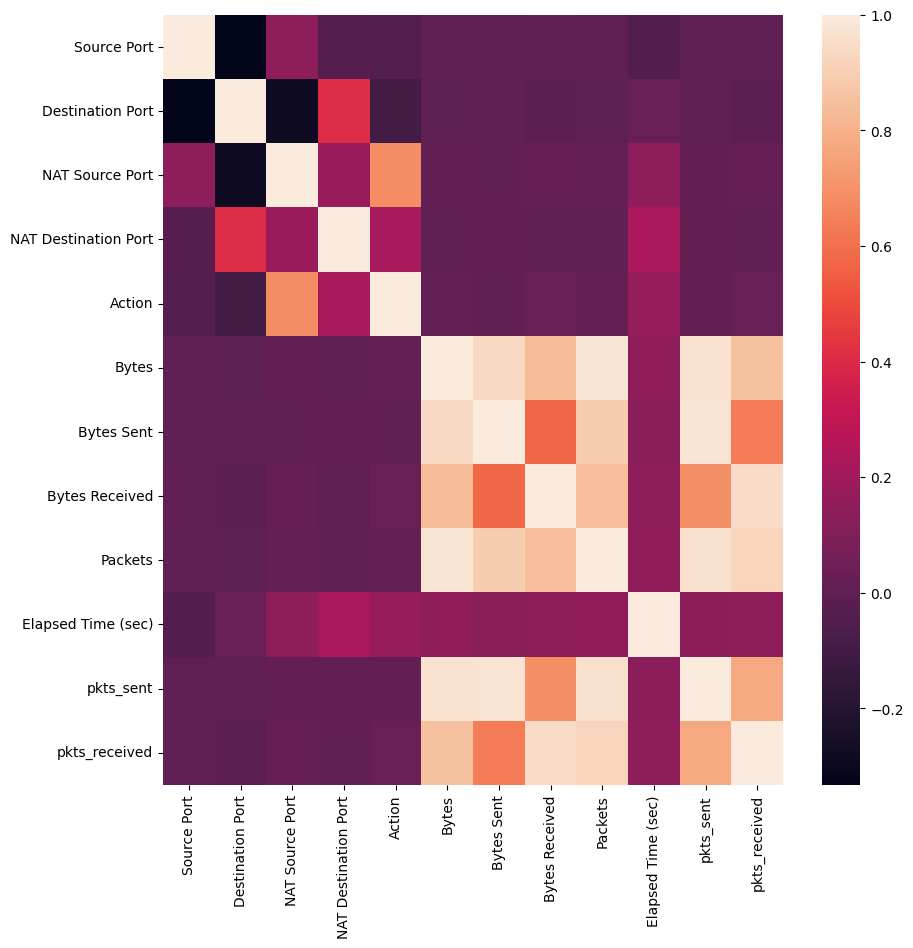

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

plt.show()

In [11]:
def plot_cm(y_test,predicted):
  cm = confusion_matrix(y_test,predicted)
  sns.heatmap(cm,annot=True,fmt='g',cmap='Pastel1',cbar=False,square=True)
  plt.ylabel('Prediction',fontsize=13)
  plt.xlabel('Actual',fontsize=13)



e:\Agentic\RL_testing\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
e:\Agentic\RL_testing\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\Agentic\RL_testing\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1

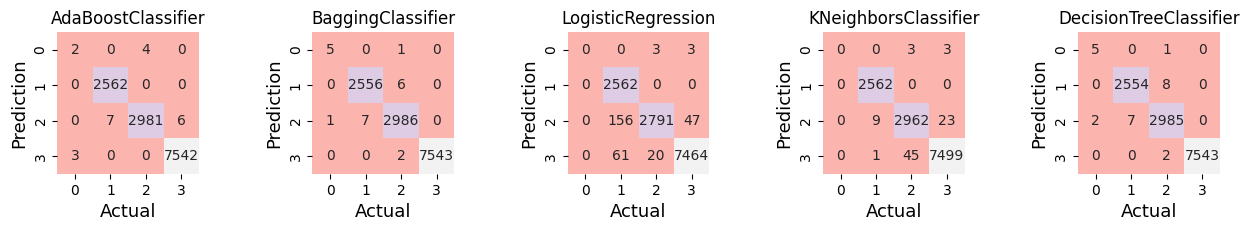

AdaBoostClassifier: 0.9984740978103304
BaggingClassifier: 0.9987029831387808
LogisticRegression: 0.9778744182497902
KNeighborsClassifier: 0.9935912108033875
DecisionTreeClassifier: 0.9984740978103304


In [16]:
results = { 'ML Model':[],
    'Accuracy':[],'F1 Score':[],
      'Precision':[], "Recall":[],'roc_auc score':[]}
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV, RidgeClassifier, SGDClassifier
from sklearn.calibration import  CalibratedClassifierCV
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
# from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list of classifiers
classifiers = [
    AdaBoostClassifier(),
    BaggingClassifier(),
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier()
    
]
fig = plt.figure(figsize=[15,15])
fig.subplots_adjust(hspace=0.2, wspace=0.8)
# Create a dictionary to store the classifiers and their accuracy scores
classifier_dict = {}
# Iterate over each classifier
for i, clf in enumerate(classifiers):
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    FI=f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    
    # Store the classifier and its accuracy score in the dictionary
    classifier_dict[clf] = accuracy
    results['ML Model'].append(clf.__class__.__name__)
    results['Accuracy'].append(accuracy)
    results['F1 Score'].append(FI)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    try :
        rc=roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')
        results['roc_auc score'].append(rc)
    except :
        results['roc_auc score'].append(np.nan)
    plt.subplot(5,5,i+1)
    plot_cm(y_test,y_pred)
    plt.title(clf.__class__.__name__)
plt.show()
# Print the accuracy scores
for clf, accuracy in classifier_dict.items():
    print(f"{clf.__class__.__name__}: {accuracy}")

In [17]:
results=pd.DataFrame(results)
results

,ML Model,Accuracy,F1 Score,Precision,Recall,roc_auc score
0,AdaBoostClassifier,0.998474,0.839708,0.848785,0.832148,0.962948
1,BaggingClassifier,0.998703,0.956956,0.956899,0.957014,0.999554
2,LogisticRegression,0.977874,0.727940,0.726772,0.730366,0.885190
3,KNeighborsClassifier,0.993591,0.744988,0.744177,0.745804,0.956931
4,DecisionTreeClassifier,0.998474,0.940708,0.926970,0.956735,0.978187


In [18]:
results['ML Model']

0        AdaBoostClassifier
1         BaggingClassifier
2        LogisticRegression
3      KNeighborsClassifier
4    DecisionTreeClassifier
Name: ML Model, dtype: object

In [25]:
import joblib

# Dictionary to map names to models (make sure they are trained in your loop)
model_names = [clf.__class__.__name__ for clf in classifiers]
trained_models = dict(zip(model_names, classifiers))

# Save each trained model
for name, model in trained_models.items():
    filename = f"{name}.pkl"
    joblib.dump(model, filename)
    print(f"✅ Saved model as {filename}")


✅ Saved model as AdaBoostClassifier.pkl
✅ Saved model as BaggingClassifier.pkl
✅ Saved model as LogisticRegression.pkl
✅ Saved model as KNeighborsClassifier.pkl
✅ Saved model as DecisionTreeClassifier.pkl


In [23]:
whos


Variable                        Type                      Data/Info
-------------------------------------------------------------------
AdaBoostClassifier              ABCMeta                   <class 'sklearn.ensemble.<...>ting.AdaBoostClassifier'>
BaggingClassifier               ABCMeta                   <class 'sklearn.ensemble.<...>gging.BaggingClassifier'>
BernoulliNB                     ABCMeta                   <class 'sklearn.naive_bayes.BernoulliNB'>
CalibratedClassifierCV          type                      <class 'sklearn.calibrati<...>.CalibratedClassifierCV'>
DecisionTreeClassifier          ABCMeta                   <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
DummyClassifier                 type                      <class 'sklearn.dummy.DummyClassifier'>
ExtraTreeClassifier             ABCMeta                   <class 'sklearn.tree._cla<...>ses.ExtraTreeClassifier'>
ExtraTreesClassifier            ABCMeta                   <class 'sklearn.ensemble.<...>st.Extra